# PageRank

One of the main challenges of a search engine is finding relevant links that a user has searched on the web. If a user, or a surfer, were to search a topic on the internet, the search results should show links in order of its importance. The importance of a link measures how informative and related it is to the surfer's needs. But how can we do this? A solution to this is to construct an algorithm by representing these links and the internet structure, mathematically. In 1998, Lawrence Page and Sergey Brin at Stanford University proposed an efficient algorithm, PageRank. \textit{PageRank} is a Google search engine algorithm that ranks web-pages in a search engine result using the link structure of the web. Many researchers are studying other applications to this concept. This algorithm is currently being used in bibliometrics, social \& information network analysis, link prediction, recommendation, biology, chemistry, neuroscience, and physics. While there are many improved methods in quantifying the importance of the web pages, the PageRank algorithm continues to be the basis for web search tools. This shows the importance of learning the fundamentals of PageRank.  This paper investigates the mathematical concepts of the PageRank algorithm. This paper will demonstrate how to quantify the importance of web pages. Fundamentals of Probability theory, Linear Algebra, and Numerical Analysis taught in the ME 360 class are utilized.

## Mathematical Preliminaries

### Steady State Distribution of PageRank
In a given network of web-pages, we consider: 

* $n$ number of nodes, or vertices
* link, or edge that connects nodes together

The web-page network can be represented as an $n \times n$ matrix, where row $i$ represents the incoming arrows to node $i$, while column $j$ represents the outgoing arrows from node $j$. The *Adjacency matrix*, $\textbf{A} \in \mathbb{R}^{n \times n}$ quantifies any links for all possible node connections. Each elements in $\textbf{A}$ are determined as follows,

$$ A_{ij}=  \left\{
\begin{array}{ll}
      1 & \text{node i and node j are linked} \\
      0 & else
\end{array} 
\right. $$

The *Google matrix* $\textbf{G} \in \mathbb{R}^{n \times n} $, or called *Transition Matrix* is a matrix representation of a web network. This is used to determine the page rank vector $\vec{p} \in \mathbb{R}^{n \times 1}$.
The adjacency matrix will be used, along with a matrix $\textbf{D} \in \mathbb{R}^{n \times n}$ in which it is formulated as follows.

$$ D_{ij}=  \left\{
\begin{array}{ll}
      \sum_{k=1}^{n} A_{ki} & i=j \\
      0 & \textrm{else}
\end{array} 
\right. $$

The Google matrix will now be expressed in the following.

$$\textbf{G} = \textbf{A}\textbf{D}^{-1}$$

An important information about $\textbf{G}$ is that it is a stochastic matrix. A *stochastic matrix* is a square matrix in which has the following properties.


* $0 \leq G_{ij} \leq 1, \forall i,j$
* $ \sum_{i=1}^{n} G_{ij} = 1$ 
* $\textbf{G}$ is a matrix that always has the largest eigenvalue $\lambda_{1} = 1$
* All other eigenvalues of $G$ are $|\lambda_{i} |\leq 1$.

The third bullet suggests a stationary probabilistic vector, which is the PageRank vector $\vec{p}$ by using the eigenvalue of 1. We will formulate the PageRank equation as an eigenvector that is associated with an eigenvalue of 1. This is formulated as follows.

$$\textbf{G} \vec{p} = \vec{p}$$

The PageRank vector $\vec{p} \in \mathbb{R}^{n}$ are the probabilities, or the \textit{rank} of each nodes. We can also think of $p_i$
as the proportion of time spent by the surfer at node $i$. Below are the ranking vector properties. 

* $0 \leq  p_{i} \leq 1$ 
* $\sum_{i=1}^{n} p_i = 1$

### Computing the PageRank using the Random Walk method

A *random walk* is a stochastic process that describes the path that an object, or walker, moves in discrete steps, where each direction of steps are taken randomly . In PageRank, this describes a randomly-moving surfer along the network. We can quantify the probability that a random surfer is at node $j$, starting from node $i$ for $t$ steps. 

$$p_{j}^{[t]} = p(\text{random surfer will reach node } j \text{ in } t \text{ steps})$$

Skipping the theoretical part of the random walk concept, the idea is that, for many steps (e.g. $T$) in a walk, the probabilities the surfer will land in each possible node will be.

$$p_{j}^{[T]} \approx p_j \text{ (element in the PageRank vector)}$$

### Modification to the PageRank Algorithm
There are problems in interpreting a web network using the transition matrix. Suppose there is a node that has no out-links, called a dangling node. A random surfer will get stuck at this node, and the importance received cannot be propagated. Another problem is the disconnected nodes. If a random surfer is on one of the disconnected nodes, the surfer won't be able to access the other node due to the zero-valued importance. Page and Brin proposed a modified method that solved the problems. The modification made implements a *jump probability* $q$, or called a *damping factor*. The factor $q$ is a positive number between 0 and 1. This represents that probability that the surfer moves to a random page on the web network, instead of clicking on a link of a current page. The modification of the transition matrix will now be the following.

$$ G'_{ij}= q \frac{1}{n} + (1-q)G_{ij} $$

The matrix representation of the Google matrix $\textbf{G}$ is expressed as,
$$\textbf{G'} = q \textbf{1}\frac{1}{n} + (1-q)\textbf{G} $$
where $\textbf{1}$ is an $n \times n$ matrix of ones. It is reported that Google uses the jump probability $q$ to be $0.15$ (or $0.85$ depending on the $G'$ equation).
To use this matrix for determining its steady state distribution, we have to verify this is a stochastic matrix. To verify this, we use the fact that the sum of all the rows in a column has to be equal to 1. 

\begin{gather*}
\sum_{j=1}^{n} q \frac{1}{n} + (1-q)G_{ij} = \sum_{j=1}^{n} q \frac{1}{n} + \sum_{j=1}^{n} (1-q)G_{ij} \\ 
q + (1-q)\sum_{j=1}^{n} G_{ij} = q + (1-q) = 1
\end{gather*}

## Experimental Setup

In this project, I will use the PageRank algorithm using the network structure provided by the ME 360 textbook. Python3 is a programming language used to code. I will rank the links using three different approaches: with regular transition matrix, Random-Walk method, and modified transition matrix. These programs can be used for any other network structure by representing them as a matrix $\textbf{A}$.

### Examples

For a given network in the figure below,

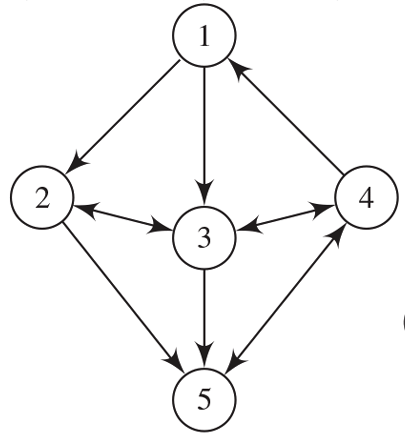

In [4]:
from PIL import Image
import os

Image.open('PageRank/Example1.png')


The adjacency matrix $\textbf{A}$ and the matrix $\textbf{D}$ is 
\begin{equation*}
\textbf{A} = 
\begin{bmatrix}
0 & 0 & 0 & 1 & 0 \\ 1 & 0 & 1 & 0 & 0 \\ 1 & 1 & 0 & 1 & 0 \\ 0 & 0 & 1 & 0 & 1 \\ 0 & 1 & 1 & 1 & 0 \end{bmatrix} ,  
\textbf{D} = \begin{bmatrix} 2 & 0 & 0 & 0 & 0 \\ 0 & 2 & 0 & 0 & 0 \\ 0 & 0 & 3 & 0 & 0 \\ 0 & 0 & 0 & 3 & 0 \\ 0 & 0 & 0 & 0 & 1 \end{bmatrix}
\end{equation*}
Computing the $\textbf{G} = \textbf{A}\textbf{D}^{-1}$ will result in

$$\textbf{G} = 
\begin{bmatrix}
0 & 0 & 0 & \frac{1}{3} & 0 \\ 
\frac{1}{2} & 0 & \frac{1}{3} & 0 & 0 \\ 
\frac{1}{2} & \frac{1}{2} & 0 & \frac{1}{3} & 0 \\ 
0 & 0 & \frac{1}{3} & 0 & 1 \\ 
0 & \frac{1}{2} & \frac{1}{3} & \frac{1}{3} & 0 
\end{bmatrix}
$$

To compute the PageRank vector $\vec{p}$ the following shows code in Python3.

In [17]:
import numpy as np
import scipy

A = np.array([[0,0,0,1,0],[1,0,1,0,0],[1,1,0,1,0],[0,0,1,0,1],[0,1,1,1,0]])

# Computes the D matrix
D = np.zeros((A.shape[0],A.shape[1]))
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i == j:
            D[i][j] = np.sum(A.T[i])
        else:
            D[i][j] = 0
G = A @ np.linalg.inv(D)

# Computing the eigenvector and eigenvalue
value,vector = np.linalg.eig(G)

# Normalizing the eigenvector associated with the eigenvalue of 1
PageRank_vec = np.array([abs(vector[:,0].T/np.sum(vector[:,0]))])

The PageRank vector is then computed to be       

In [18]:
PageRank_vec

array([[0.10416667, 0.125     , 0.21875   , 0.3125    , 0.23958333]])

Using the Random walk method, below is the code that generates $T = 100000$ random walks the surfer takes along the same network.

In [26]:
import random
import matplotlib.pyplot as plt
node = 1 # At which node does the surfer start
N = 5 # Total number of nodes in a network
steps = 100000 # Number of steps to walk

nodes = [] # storage for the histogram
for i in range(steps):
    flag = 0
    next_node = 0
    u = random.random() # between 0 and 1. Randomizes the path directions.
    cu = 0 # Threshold on where the surfer should go.
    
    for j in range(N):
        cu += G[j][node]
        if (flag ==0) and (u <= cu): # Sets the surfer where to go.
            next_node = j
            flag = 1
    
    nodes.append(node) # Stores where the surfer landed
    node = next_node

nodes = [nodes[i] + 1 for i in range(len(nodes))]

For each node, the number of times the surfer lands are counted. Figure below is a histogram of the number of times the surfer lands on the nodes. 

Text(0.5, 1.0, 'Histogram of Landed Nodes for 100000 steps')

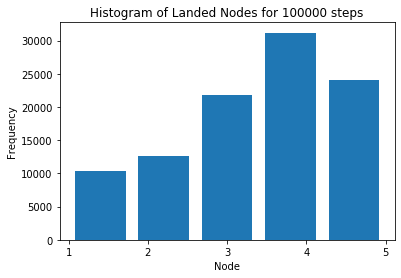

In [27]:
dist = plt.hist(nodes,bins = 5,rwidth=0.8)
plt.xticks(range(1,N+1))
plt.xlabel('Node')
plt.ylabel('Frequency')
plt.title('Histogram of Landed Nodes for {} steps'.format(steps))

Lastly, dividing each bin by the total number of steps gives the probability distribution.

In [28]:
dist[0]/steps

array([0.10422, 0.12554, 0.21842, 0.31187, 0.23995])

which is approximately the computed PageRank vector. 

Using the modified version, and $q = 0.15$ , the Google matrix is 

$$\textbf{G'} = (0.15)
\begin{bmatrix}1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix} \frac{1}{5}
 + (1 - 0.15)\begin{bmatrix}
0 & 0 & 0 & \frac{1}{3} & 0 \\ 
\frac{1}{2} & 0 & \frac{1}{3} & 0 & 0 \\ 
\frac{1}{2} & \frac{1}{2} & 0 & \frac{1}{3} & 0 \\ 
0 & 0 & \frac{1}{3} & 0 & 1 \\ 
0 & \frac{1}{2} & \frac{1}{3} & \frac{1}{3} & 0 
\end{bmatrix} = 
\begin{bmatrix} 
0.03 & 0.03 & 0.03 & 0.313 & 0.03 \\
0.455 & 0.03 & 0.313 & 0.03 & 0.03 \\
0.455 & 0.455 & 0.03 & 0.313 & 0.03 \\
0.03 & 0.03 & 0.0313 & 0.03 & 0.88 \\
0.03 & 0.445 & 0.313 & 0.313 & 0.03 \end{bmatrix}
$$

Below is the code used to compute the PageRank vector.

In [41]:
A = np.array([[0,0,0,1,0],[1,0,1,0,0],[1,1,0,1,0],[0,0,1,0,1],[0,1,1,1,0]])
ni,nj = A.shape
# Computes the D matrix
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        if i == j:
            D[i][j] = np.sum(A.T[i])
        else:
            D[i][j] = 0

G = A @ np.linalg.inv(D)
I = np.ones((ni,nj))
q = 0.15

#Computing the modified Google matrix
G_prime = ((q)*I)/ni + (1-q)*G

#Computing the eigenvector and eigenvalue
value,vector = np.linalg.eig(G_prime)

#Normalizing the eigenvector associated with the eigenvalue of 1
modified_PageRank_vec = np.array([abs(vector[:,0].T/np.sum(vector[:,0]))])

The PageRank vector is then computed to be 

In [42]:
modified_PageRank_vec

array([[0.11271956, 0.14031227, 0.22025808, 0.29195137, 0.23475873]])

Using the jump probability of $0.5$, the Google matrix and the rank vector is,

In [43]:
q = 0.5
G_prime = ((q)*I)/ni + (1-q)*G

print('G_prime = ','\n',G_prime, '\n')
value,vector = np.linalg.eig(G_prime)
print('p = ','\n',np.array([abs(vector[:,0].T/np.sum(vector[:,0]))]) )

G_prime =  
 [[0.1        0.1        0.1        0.26666667 0.1       ]
 [0.35       0.1        0.26666667 0.1        0.1       ]
 [0.35       0.35       0.1        0.26666667 0.1       ]
 [0.1        0.1        0.26666667 0.1        0.6       ]
 [0.1        0.35       0.26666667 0.26666667 0.1       ]] 

p =  
 [[0.14115139 0.17185501 0.21940299 0.24690832 0.2206823 ]]


## Results \& Discussion

The stochastic matrices $\textbf{G}$ and $\textbf{G'}$ holds the property that the sum of each columns are equal to 1. This property shows that the matrices are stochastic matrices.
The computed rank vectors $\vec{p}$ shows the probability distribution of the nodes in the given network. Note the sum of elements in the vector is 1. This is due to the law of total probability. The result of the Random walk method shows the approximate value of the rank vector using the regular transition matrix. This shows that the codes and the computations are consistent. However, computing random walk method is slower due its iterative approach. My program has two for-loops that will possibly be computationally heavy if there are thousands of nodes. The results using the modified transition matrix shows similar results. Results also show that for any $q$, the matrix $\textbf{G'}$ is a stochastic matrix.

## Conclusion

Because of the PageRank algorithm, we can now quantify the importance of web-links. For a user that wants to look up a topic, the search engine can output only the links of that topic, in order of its relevance. By understanding the fundamentals of this algorithm, we can implement this in many applications and we can possibly improve its computations.

### Up next: 
* Sports Ranking